# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Load and Preview Dataset

In [5]:
df = pd.read_csv(r'E:\PYTHONCLASSJUPYTER\PrakashSenapati\2024_10_16_Knn\Breast_Cancer_Knn\breast_cancer.csv', header=None)

In [6]:
df.shape

(699, 11)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [9]:
df.columns = col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [10]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
df.head().T

,0,1,2,3,4
Id,1000025,1002945,1015425,1016277,1017023
Clump_thickness,5,5,3,6,4
Uniformity_Cell_Size,1,4,1,8,1
Uniformity_Cell_Shape,1,4,1,8,1
Marginal_Adhesion,1,5,1,1,3
Single_Epithelial_Cell_Size,2,7,2,3,2
Bare_Nuclei,1,10,2,4,1
Bland_Chromatin,3,3,3,3,3
Normal_Nucleoli,1,2,1,7,1
Mitoses,1,1,1,1,1


# Drop Redundant Columns

In [12]:
df.drop('Id', axis=1, inplace=True)

In [13]:
df.head().T

,0,1,2,3,4
Clump_thickness,5,5,3,6,4
Uniformity_Cell_Size,1,4,1,8,1
Uniformity_Cell_Shape,1,4,1,8,1
Marginal_Adhesion,1,5,1,1,3
Single_Epithelial_Cell_Size,2,7,2,3,2
Bare_Nuclei,1,10,2,4,1
Bland_Chromatin,3,3,3,3,3
Normal_Nucleoli,1,2,1,7,1
Mitoses,1,1,1,1,1
Class,2,2,2,2,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [15]:
for var in df.columns:
    print(df[var].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

# Convert data type of Bare_Nuclei as integer

In [16]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [18]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

# Missing values in variables

In [19]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [20]:
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [21]:
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [22]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [23]:
df['Bare_Nuclei'].isna().sum()

16

# Check frequency distribution of target variable `Class`

In [24]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

**Check percentage of frequency distribution of Class:-**

In [26]:
df['Class'].value_counts() / float(len(df))

Class
2    0.655222
4    0.344778
Name: count, dtype: float64

# Outliers in numerical variables

In [28]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.42,2.82,1.0,2.0,4.0,6.0,10.0
Uniformity_Cell_Size,699.0,3.13,3.05,1.0,1.0,1.0,5.0,10.0
Uniformity_Cell_Shape,699.0,3.21,2.97,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.81,2.86,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.22,2.21,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.54,3.64,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,699.0,3.44,2.44,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.87,3.05,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.59,1.72,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.69,0.95,2.0,2.0,2.0,4.0,4.0


# Univariate Analysis

<font color=red>__Check the distribution of variables:__</font>

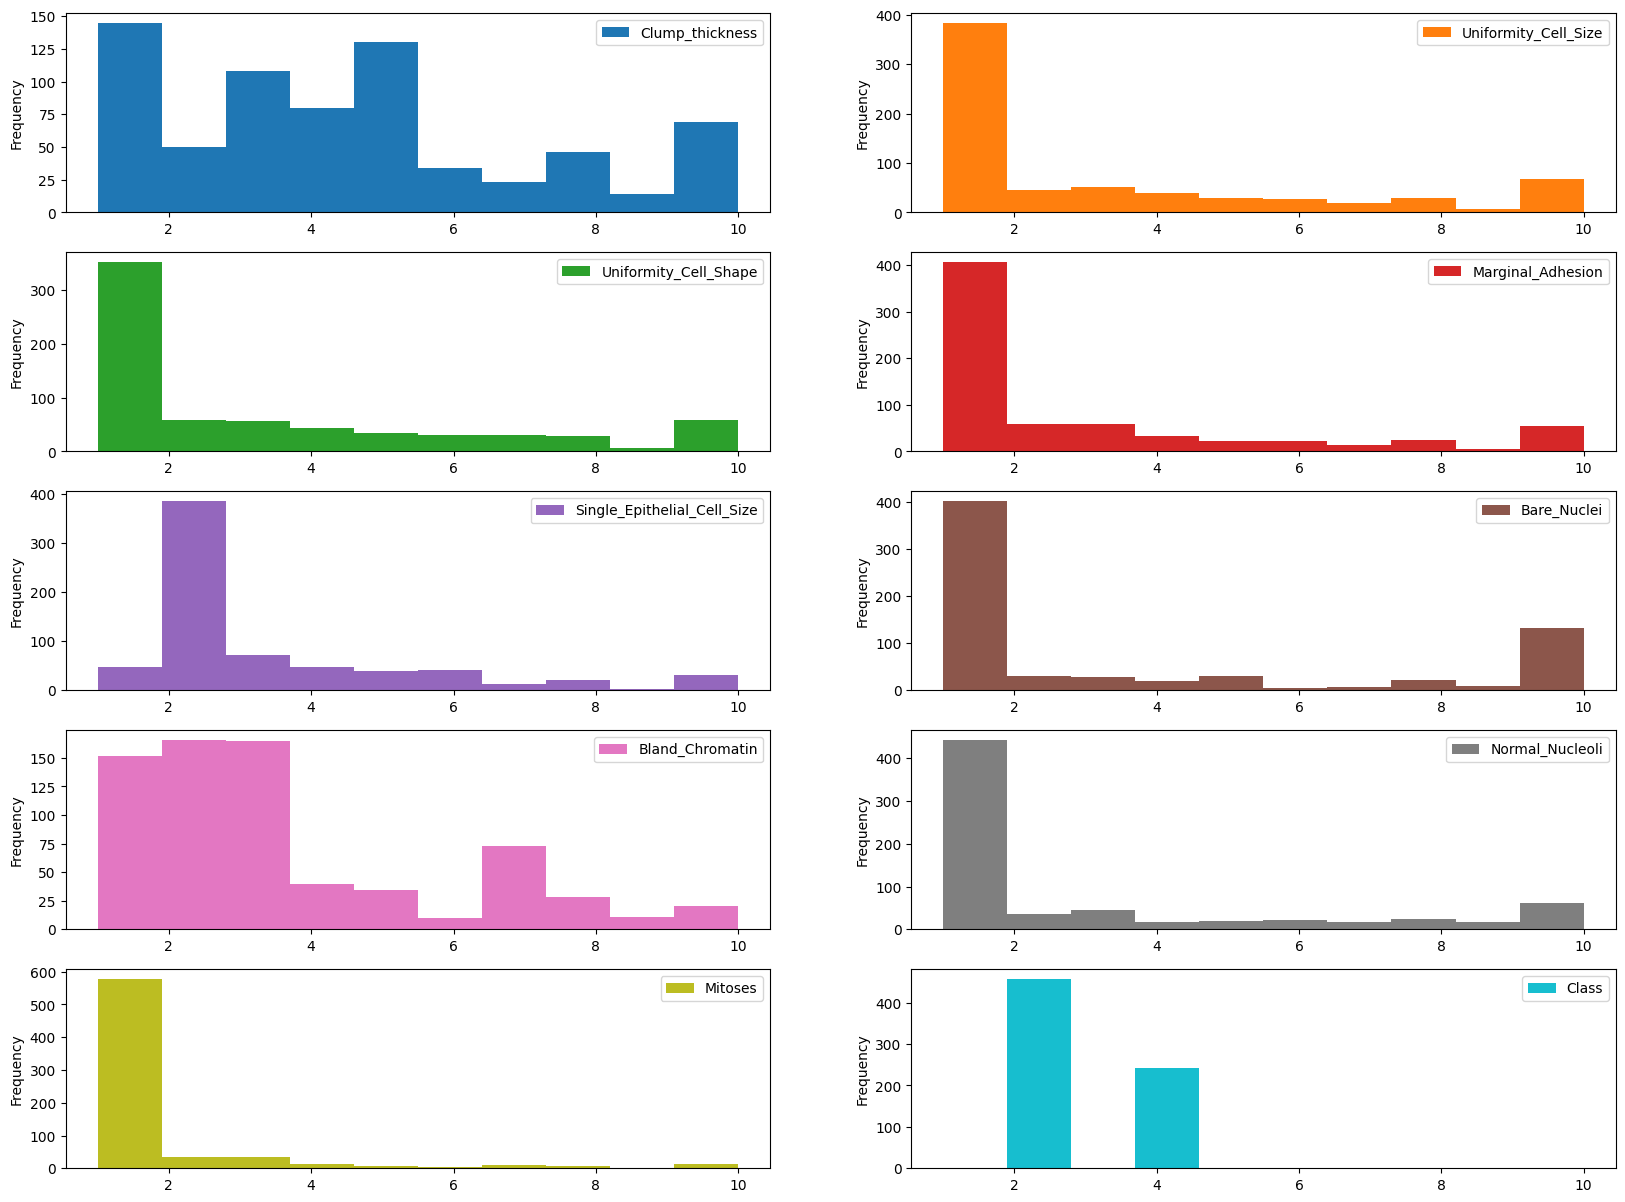

In [32]:
plt.rcParams['figure.figsize']=(20,15)
df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

# Multivariate Analysis

<font color=red>__Estimating correlation coefficients:__</font>

In [34]:
correlation = df.corr()
correlation

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


In [37]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

<font color=red>__Correlation Heat Map (Discover patterns and relationships) :__</font>

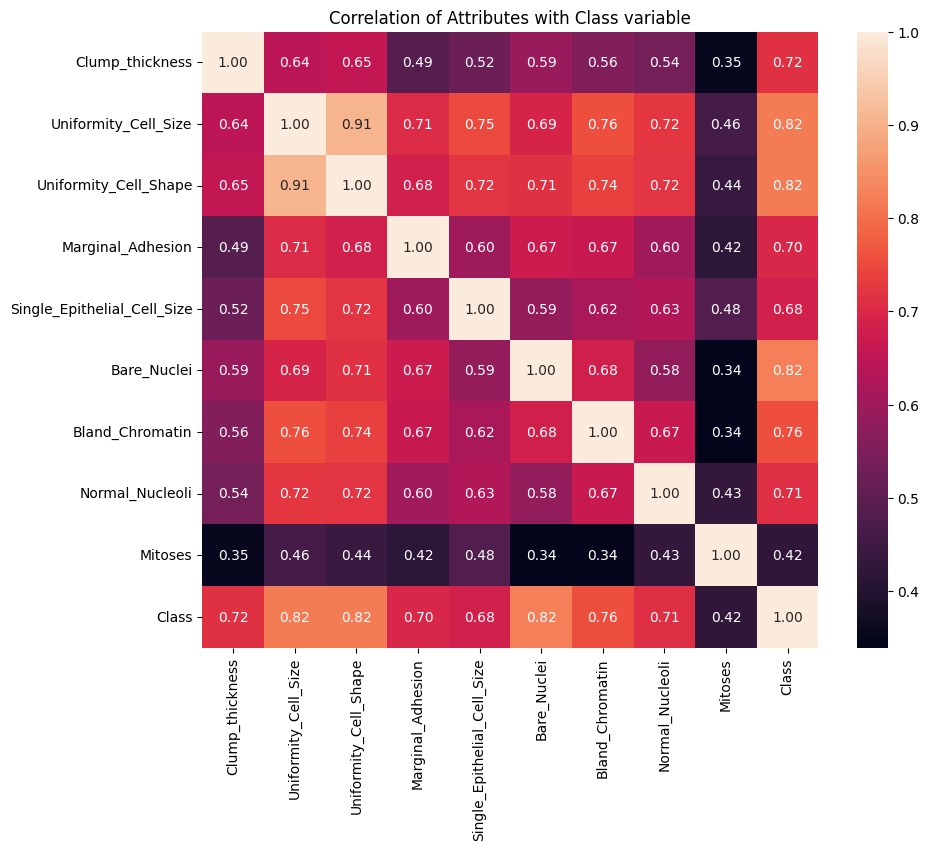

In [42]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=360)           
plt.show()

# Declare Feature Vector `(X)` and Target Variable `(y)`

In [43]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [45]:
print( X.shape )
print( y.shape )

(699, 9)
(699,)


In [49]:
X.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [48]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

# Split `X, y` into training and testing set

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(559, 9)
(140, 9)
(559,)
(140,)


In [53]:
X_train.head().T

,293,62,485,422,332
Clump_thickness,10.0,9.0,1.0,4.0,5.0
Uniformity_Cell_Size,4.0,10.0,1.0,3.0,2.0
Uniformity_Cell_Shape,4.0,10.0,1.0,3.0,2.0
Marginal_Adhesion,6.0,1.0,3.0,1.0,2.0
Single_Epithelial_Cell_Size,2.0,10.0,1.0,2.0,2.0
Bare_Nuclei,10.0,8.0,3.0,1.0,1.0
Bland_Chromatin,2.0,3.0,1.0,3.0,2.0
Normal_Nucleoli,3.0,3.0,1.0,3.0,2.0
Mitoses,1.0,1.0,1.0,1.0,1.0


In [55]:
y_train.head()

293    4
62     4
485    2
422    2
332    2
Name: Class, dtype: int64

# Feature Engineering

In [56]:
X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [57]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [58]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [59]:
X_train.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'],
      dtype='object')

In [64]:
X_train[X_train['Bare_Nuclei'].isnull()].T

,315,249,158,164,145,297,139,275,411,23,292,321,617
Clump_thickness,4.0,3.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,8.0,8.0,3.0,1.0
Uniformity_Cell_Size,6.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,4.0,8.0,1.0,1.0
Uniformity_Cell_Shape,5.0,1.0,2.0,1.0,3.0,3.0,1.0,3.0,1.0,5.0,8.0,1.0,1.0
Marginal_Adhesion,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Single_Epithelial_Cell_Size,7.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0
Bare_Nuclei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bland_Chromatin,4.0,3.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,7.0,6.0,3.0,1.0
Normal_Nucleoli,9.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,10.0,1.0,1.0
Mitoses,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [61]:
X_train['Bare_Nuclei'].isnull().mean()

0.023255813953488372

In [60]:
for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Bare_Nuclei 0.0233


<font color=red>__Impute missing values in X_train and X_test all columns with corresponding column's median :__</font>

In [71]:
X_train.head().T

,293,62,485,422,332
Clump_thickness,10.0,9.0,1.0,4.0,5.0
Uniformity_Cell_Size,4.0,10.0,1.0,3.0,2.0
Uniformity_Cell_Shape,4.0,10.0,1.0,3.0,2.0
Marginal_Adhesion,6.0,1.0,3.0,1.0,2.0
Single_Epithelial_Cell_Size,2.0,10.0,1.0,2.0,2.0
Bare_Nuclei,10.0,8.0,3.0,1.0,1.0
Bland_Chromatin,2.0,3.0,1.0,3.0,2.0
Normal_Nucleoli,3.0,3.0,1.0,3.0,2.0
Mitoses,1.0,1.0,1.0,1.0,1.0


In [105]:
X_test.head().T

,476,531,40,432,14
Clump_thickness,4.0,4.0,6.0,5.0,8.0
Uniformity_Cell_Size,1.0,2.0,6.0,1.0,7.0
Uniformity_Cell_Shape,2.0,2.0,6.0,1.0,5.0
Marginal_Adhesion,1.0,1.0,9.0,1.0,10.0
Single_Epithelial_Cell_Size,2.0,2.0,6.0,2.0,7.0
Bare_Nuclei,1.0,1.0,NaN,1.0,9.0
Bland_Chromatin,1.0,2.0,7.0,2.0,5.0
Normal_Nucleoli,1.0,1.0,8.0,2.0,5.0
Mitoses,1.0,1.0,1.0,1.0,4.0


In [98]:
for df1 in [X_train]:
    print(df1[0:3])

     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
293               10                     4                      4   
62                 9                    10                     10   
485                1                     1                      1   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
293                  6                            2         10.0   
62                   1                           10          8.0   
485                  3                            1          3.0   

     Bland_Chromatin  Normal_Nucleoli  Mitoses  
293                2                3        1  
62                 3                3        1  
485                1                1        1  


In [104]:
for df1 in [X_train, X_test]:
    print(df1[0:2])
    print('\n======================================================================\n')

     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
293               10                     4                      4   
62                 9                    10                     10   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
293                  6                            2         10.0   
62                   1                           10          8.0   

     Bland_Chromatin  Normal_Nucleoli  Mitoses  
293                2                3        1  
62                 3                3        1  


     Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
476                4                     1                      2   
531                4                     2                      2   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
476                  1                            2          1.0   
531                  1                            2          1.0   

     Bland_Chromatin  Nor

In [99]:
X_train.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'],
      dtype='object')

In [107]:
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [108]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [109]:
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [110]:
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [111]:
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

# Feature Scaling

In [112]:
X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [113]:
X_train.head().T

,293,62,485,422,332
Clump_thickness,10.0,9.0,1.0,4.0,5.0
Uniformity_Cell_Size,4.0,10.0,1.0,3.0,2.0
Uniformity_Cell_Shape,4.0,10.0,1.0,3.0,2.0
Marginal_Adhesion,6.0,1.0,3.0,1.0,2.0
Single_Epithelial_Cell_Size,2.0,10.0,1.0,2.0,2.0
Bare_Nuclei,10.0,8.0,3.0,1.0,1.0
Bland_Chromatin,2.0,3.0,1.0,3.0,2.0
Normal_Nucleoli,3.0,3.0,1.0,3.0,2.0
Mitoses,1.0,1.0,1.0,1.0,1.0


In [114]:
X_test.head().T

,476,531,40,432,14
Clump_thickness,4.0,4.0,6.0,5.0,8.0
Uniformity_Cell_Size,1.0,2.0,6.0,1.0,7.0
Uniformity_Cell_Shape,2.0,2.0,6.0,1.0,5.0
Marginal_Adhesion,1.0,1.0,9.0,1.0,10.0
Single_Epithelial_Cell_Size,2.0,2.0,6.0,2.0,7.0
Bare_Nuclei,1.0,1.0,1.0,1.0,9.0
Bland_Chromatin,1.0,2.0,7.0,2.0,5.0
Normal_Nucleoli,1.0,1.0,8.0,2.0,5.0
Mitoses,1.0,1.0,1.0,1.0,4.0


In [116]:
cols = X_train.columns
cols

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'],
      dtype='object')

In [117]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
X_train.shape

(559, 9)

In [125]:
X_test.shape

(140, 9)

In [122]:
for row in range(5):
    print( X_train[row] )
    print()

[ 2.02838346  0.2995061   0.28957312  1.11907675 -0.54654273  1.85835655
 -0.57777378  0.04124139 -0.32425801]

[ 1.66945141  2.25768045  2.30456946 -0.62247087  3.10687891  1.29758931
 -0.1599529   0.04124139 -0.32425801]

[-1.20200501 -0.67958108 -0.71792505  0.07414818 -1.00322043 -0.10432879
 -0.99559467 -0.60816532 -0.32425801]

[-0.12520886 -0.0268563  -0.04625961 -0.62247087 -0.54654273 -0.66509603
 -0.1599529   0.04124139 -0.32425801]

[ 0.2337232  -0.35321869 -0.38209233 -0.27416134 -0.54654273 -0.66509603
 -0.57777378 -0.28346196 -0.32425801]



In [123]:
for row in range(5):
    print( X_test[row] )
    print()

[-0.12520886 -0.67958108 -0.38209233 -0.62247087 -0.54654273 -0.66509603
 -0.99559467 -0.60816532 -0.32425801]

[-0.12520886 -0.35321869 -0.38209233 -0.62247087 -0.54654273 -0.66509603
 -0.57777378 -0.60816532 -0.32425801]

[ 0.59265525  0.95223088  0.96123857  2.16400532  1.28016809 -0.66509603
  1.51133064  1.66475816 -0.32425801]

[ 0.2337232  -0.67958108 -0.71792505 -0.62247087 -0.54654273 -0.66509603
 -0.57777378 -0.28346196 -0.32425801]

[1.31051936 1.27859327 0.62540584 2.51231485 1.7368458  1.57797293
 0.67568887 0.6906481  1.49440649]



In [126]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [127]:
X_train.head().T

,0,1,2,3,4
Clump_thickness,2.028383,1.669451,-1.202005,-0.125209,0.233723
Uniformity_Cell_Size,0.299506,2.257680,-0.679581,-0.026856,-0.353219
Uniformity_Cell_Shape,0.289573,2.304569,-0.717925,-0.046260,-0.382092
Marginal_Adhesion,1.119077,-0.622471,0.074148,-0.622471,-0.274161
Single_Epithelial_Cell_Size,-0.546543,3.106879,-1.003220,-0.546543,-0.546543
Bare_Nuclei,1.858357,1.297589,-0.104329,-0.665096,-0.665096
Bland_Chromatin,-0.577774,-0.159953,-0.995595,-0.159953,-0.577774
Normal_Nucleoli,0.041241,0.041241,-0.608165,0.041241,-0.283462
Mitoses,-0.324258,-0.324258,-0.324258,-0.324258,-0.324258


In [128]:
X_test.head().T

,0,1,2,3,4
Clump_thickness,-0.125209,-0.125209,0.592655,0.233723,1.310519
Uniformity_Cell_Size,-0.679581,-0.353219,0.952231,-0.679581,1.278593
Uniformity_Cell_Shape,-0.382092,-0.382092,0.961239,-0.717925,0.625406
Marginal_Adhesion,-0.622471,-0.622471,2.164005,-0.622471,2.512315
Single_Epithelial_Cell_Size,-0.546543,-0.546543,1.280168,-0.546543,1.736846
Bare_Nuclei,-0.665096,-0.665096,-0.665096,-0.665096,1.577973
Bland_Chromatin,-0.995595,-0.577774,1.511331,-0.577774,0.675689
Normal_Nucleoli,-0.608165,-0.608165,1.664758,-0.283462,0.690648
Mitoses,-0.324258,-0.324258,-0.324258,-0.324258,1.494406


# Fit KNN Classifier with training set `(X_train, y_train)`

In [129]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Predict `X_test`

In [130]:
y_pred = knn.predict(X_test)

In [132]:
y_pred.shape

(140,)

In [133]:
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

**2 is for probability of benign cancer and 4 is for probability of malignant cancer**

<font color=red>__predict_proba method :__</font>

In [136]:
X_test.head().T

,0,1,2,3,4
Clump_thickness,-0.125209,-0.125209,0.592655,0.233723,1.310519
Uniformity_Cell_Size,-0.679581,-0.353219,0.952231,-0.679581,1.278593
Uniformity_Cell_Shape,-0.382092,-0.382092,0.961239,-0.717925,0.625406
Marginal_Adhesion,-0.622471,-0.622471,2.164005,-0.622471,2.512315
Single_Epithelial_Cell_Size,-0.546543,-0.546543,1.280168,-0.546543,1.736846
Bare_Nuclei,-0.665096,-0.665096,-0.665096,-0.665096,1.577973
Bland_Chromatin,-0.995595,-0.577774,1.511331,-0.577774,0.675689
Normal_Nucleoli,-0.608165,-0.608165,1.664758,-0.283462,0.690648
Mitoses,-0.324258,-0.324258,-0.324258,-0.324258,1.494406


In [156]:
y_pred_proba = knn.predict_proba(X_test)
print( y_pred_proba[0:12] )

[[1.         0.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]]


<font color=red>__Probability of getting output as 2 (Benign cancer) :__</font>

In [153]:
print( y_pred_proba[:,0] )

[1.         1.         0.33333333 1.         0.         1.
 0.         1.         0.         0.66666667 1.         1.
 0.         0.33333333 0.         1.         1.         0.
 0.         1.         0.         0.         1.         1.
 1.         0.         1.         1.         0.         0.
 1.         1.         1.         1.         1.         0.66666667
 1.         0.         1.         1.         1.         1.
 1.         1.         0.         0.         1.         0.
 1.         0.         0.         1.         1.         0.
 1.         1.         1.         1.         0.66666667 1.
 0.         1.         1.         0.         0.         0.33333333
 0.         1.         1.         0.         1.         1.
 0.         0.         1.         1.         1.         1.
 0.         1.         1.         1.         0.         1.
 1.         1.         0.         1.         0.         0.
 1.         1.         0.66666667 0.         1.         1.
 1.         0.         1.         0.    

<font color=red>__Probability of getting output as 4 (Malignant cancer) :__</font>

In [157]:
print( y_pred_proba[:,1] )

[0.         0.         0.66666667 0.         1.         0.
 1.         0.         1.         0.33333333 0.         0.
 1.         0.66666667 1.         0.         0.         1.
 1.         0.         1.         1.         0.         0.
 0.         1.         0.         0.         1.         1.
 0.         0.         0.         0.         0.         0.33333333
 0.         1.         0.         0.         0.         0.
 0.         0.         1.         1.         0.         1.
 0.         1.         1.         0.         0.         1.
 0.         0.         0.         0.         0.33333333 0.
 1.         0.         0.         1.         1.         0.66666667
 1.         0.         0.         1.         0.         0.
 1.         1.         0.         0.         0.         0.
 1.         0.         0.         0.         1.         0.
 0.         0.         1.         0.         1.         1.
 0.         0.         0.33333333 1.         0.         0.
 0.         1.         0.         1.    

# Check Accuracy Score

<font color=red>__Check X_test Prediction Accuracy :__</font>  
**`y_test` are the true/real class labels and `y_pred` are the predicted class labels of `X_test`**

In [158]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


<font color=red>__Check X_train Prediction Accuracy :__</font>

In [159]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9821


<font color=red>__Check for Overfitting and Underfitting :__</font>

In [160]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9714


**The training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.**

<font color=red>__Compare Model Accuracy with Null Accuracy :__</font>

- The model accuracy is 0.9714. But, we cannot say that our model is very good based on the above accuracy.
- We must compare it with the null accuracy.
- Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.
- So, we should first check the class distribution in the test set.

In [161]:
y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

- We can see that the occurences of most frequent class is 85.
- So, we can calculate null accuracy by dividing 85 with total number of occurences (85+55).

In [162]:
null_accuracy = 85/(85+55)
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


- We can see that our model accuracy score is 0.9714 but null accuracy score is 0.6071.
- So, we can conclude that our KNN model is doing a very good job in predicting the class labels.

# Rebuild KNN Classification Model Using Different Values of `k`

<font color=red>__Rebuild KNN Classification Model Using `k=5` :__</font>

In [164]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


<font color=red>__Rebuild KNN Classification Model Using `k=6` :__</font>

In [165]:
knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, y_train)
y_pred_6 = knn_6.predict(X_test)
print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9786


<font color=red>__Rebuild KNN Classification Model Using `k=7` :__</font>

In [166]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_7 = knn_7.predict(X_test)
print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9786


<font color=red>__Rebuild KNN Classification Model Using `k=8` :__</font>

In [167]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train, y_train)
y_pred_8 = knn_8.predict(X_test)
print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9786


<font color=red>__Rebuild KNN Classification Model Using `k=9` :__</font>

In [168]:
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, y_train)
y_pred_9 = knn_9.predict(X_test)
print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9714


# Confusion Matrix

- Provide underlying distribution of values
- Provide type of errors our classifer is making

In [171]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix:')
print(cm)
print()
print('True Positives(TP):', cm[0,0])
print('True Negatives(TN):', cm[1,1])
print('False Positives(FP):', cm[0,1])
print('False Negatives(FN):', cm[1,0])

Confusion matrix:
[[83  2]
 [ 2 53]]

True Positives(TP): 83
True Negatives(TN): 53
False Positives(FP): 2
False Negatives(FN): 2


- **The confusion matrix shows `83 + 53 = 136` correct predictions and `2 + 2 = 4` incorrect predictions**
- `FP` is also called as `Type I error` and `FN` as `Type II error`

<font color=red>__Print the Confusion Matrix with `k =7` :__</font>

In [173]:
cm_7 = confusion_matrix(y_test, y_pred_7)
print('Confusion matrix with k=7:')
print(cm_7)
print()
print('True Positives(TP):', cm_7[0,0])
print('True Negatives(TN):', cm_7[1,1])
print('False Positives(FP):', cm_7[0,1])
print('False Negatives(FN):', cm_7[1,0])

Confusion matrix with k=7:
[[83  2]
 [ 1 54]]

True Positives(TP): 83
True Negatives(TN): 54
False Positives(FP): 2
False Negatives(FN): 1


- KNN model with k=7 is providing 83 + 54 = 137 correct predictions and 2 + 1 = 3 incorrect predictions
- So, kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model.
- Hence, we got performance improvement with k=7

<font color=red>__Visualize confusion matrix with seaborn heatmap :__</font>

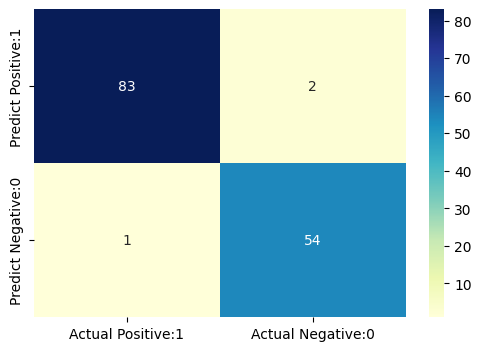

In [175]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');

# Classification Metrices

In [176]:
print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [178]:
TP = cm_7[0,0]
TN = cm_7[1,1]
FP = cm_7[0,1]
FN = cm_7[1,0]

In [179]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9786


In [180]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0214


In [181]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9765


In [182]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9881


In [183]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9881


In [184]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0357


In [185]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9643


# Adjusting the Classification Threshold Level

In [187]:
y_pred_prob = knn.predict_proba(X_test)[0:10]
print( y_pred_prob )

[[1.         0.        ]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.66666667 0.33333333]]


In [188]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])
y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,1.000000,0.000000
1,1.000000,0.000000
2,0.333333,0.666667
3,1.000000,0.000000
4,0.000000,1.000000
5,1.000000,0.000000
6,0.000000,1.000000
7,1.000000,0.000000
8,0.000000,1.000000
9,0.666667,0.333333


In [189]:
print( knn.predict_proba(X_test)[0:10, 1] )

[0.         0.         0.66666667 0.         1.         0.
 1.         0.         1.         0.33333333]


In [190]:
y_pred_1 = knn.predict_proba(X_test)[:, 1]

In [191]:
print( y_pred_1)

[0.         0.         0.66666667 0.         1.         0.
 1.         0.         1.         0.33333333 0.         0.
 1.         0.66666667 1.         0.         0.         1.
 1.         0.         1.         1.         0.         0.
 0.         1.         0.         0.         1.         1.
 0.         0.         0.         0.         0.         0.33333333
 0.         1.         0.         0.         0.         0.
 0.         0.         1.         1.         0.         1.
 0.         1.         1.         0.         0.         1.
 0.         0.         0.         0.         0.33333333 0.
 1.         0.         0.         1.         1.         0.66666667
 1.         0.         0.         1.         0.         0.
 1.         1.         0.         0.         0.         0.
 1.         0.         0.         0.         1.         0.
 0.         0.         1.         0.         1.         1.
 0.         0.         0.33333333 1.         0.         0.
 0.         1.         0.         1.    

<font color=red>__Histogram of predicted probabilities of malignant cancer :__</font>

Text(0, 0.5, 'Frequency')

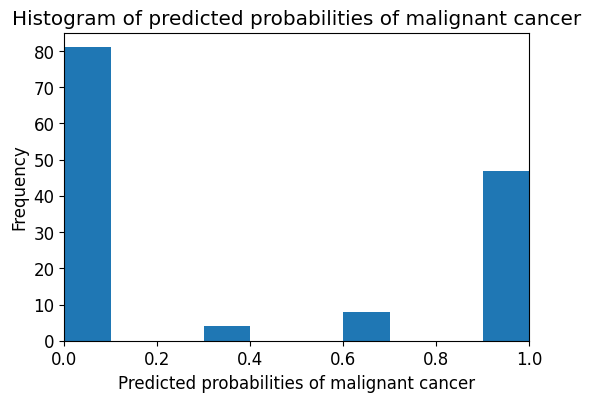

In [192]:
plt.figure(figsize=(6,4))
plt.rcParams['font.size'] = 12
plt.hist(y_pred_1, bins = 10)
plt.title('Histogram of predicted probabilities of malignant cancer')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

# ROC-AUC

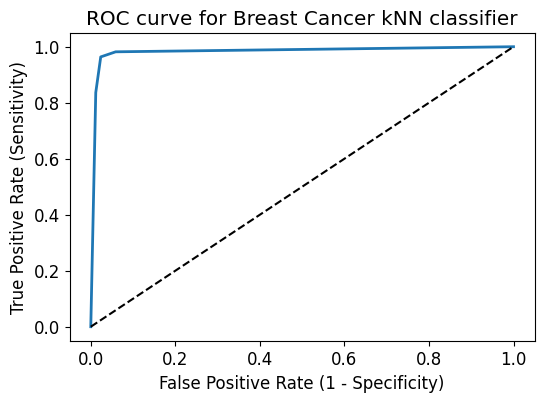

In [193]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Breast Cancer kNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [194]:
ROC_AUC = roc_auc_score(y_test, y_pred_1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9825


In [195]:
Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9910


# k-fold Cross Validation

In [198]:
scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:\n')
print(scores)

Cross-validation scores:

[0.875      0.96428571 0.94642857 0.98214286 0.96428571 0.96428571
 0.98214286 0.98214286 1.         0.98181818]


In [199]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9643


* https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic